# PyUEDGE Jupyter tutorial
Created by holm10, Dec 1 2019
Changelog:

191201 - created based on tutorial slides
200213 - updated to work with new subpackage structure

This notebook will give you an introduction into PyUEDGE using a set of simple example cases. 

First, we will consider a single simple case.

In [1]:
%cd testcase
%ls

/Users/holma2/Dropbox (Aalto)/UEDGE/personal_github/UEDGE/PyUEDGE_tutorial/testcase
case/                   gridue                  testcase_last_ii2.hdf5
grid/                   rates/


Above, we see the files in a setup directory. The case input and saved solution is stored in 'case', the EFIT grid data in 'grid', and the hydrogenic and impurity rate files are stored in 'rates'.

In [2]:
%ls case

data/      logs/      solutions/


Within each case folder, with the same setup are three directories.

data - contains the input file input.py and any files created by UEDGE during the execution, such as the gridue file, etc.
solutions - the default location where converged solutions are saved to and restored from
logs - output directory for logs when submitting batch jobs.

Next, we will import UEDGE. We will also import the 'readcase'-function from the contributed utilities. This function mimics the basis behavior, and makes it easier to execute cases that adheres to the PyUEDGE file structure.

In [3]:
from uedge import * # Initializes UEDGE
print(uedge.__file__)
#from uedge.contrib.holm10 import utils as u # Imports a set of tools developed by holm10 compatible with the tutorial
import uedge.contrib.holm10 as tools

# Set Wurlitzer which is required to get Fortran output visible in Jupyter
!pip install wurlitzer
%load_ext wurlitzer

/Users/holma2/.local/lib/python3.7/site-packages/uedge/uedge.py


Next, we will restore a saved UEDGE case in 'case', and assure convergence by executing exmain with small residuals (fnrom). Notice that we need to include the package of any UEDGE functions or variables.

In [4]:
tools.utils.readcase('case') # Read the input file 
bbb.exmain() # Execute a time step: default time-step is 1e20s, which assure a steady-state solution

File attributes:
     written on:  b'Mon Nov  4 16:00:56 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 UEDGE $Name:  $                                                                       
 Wrote file "gridue" with runid:    EFITD    09/07/90      # 66832 ,2384ms                    

 ***** Grid generation has been completed
  Updating Jacobian, npe =                      1
 iter=    0 fnrm=     0.7558267507269610E-11 nfe=      1
  Updating Jacobian, npe =                      2
 iter=    1 fnrm=     0.5611981250515267E-13 nfe=     14


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1


The first lines are the output from hdf5_restore-function, which restores a saved solution. The HDF5 files saved by PyUEDGE contains data on the UEDGE versions used and the date the file was saved. The save file contains 8 arrays which are used to populate the UEDGE initial state. However, UEDGE still has to take a time-step in order to populate the remaining variables, which is done by exmain(). The small fnorm (<1e-8) indicates that the restored case is converged at large time-step and, thus, at steady-state.

We will now have a look at the grid of the case: the plotting package can be found in uedge.contrib.ue_plot. When executing PyUEDGE using the Python command line, the produced figure will be interactive, allowing panning, zooming, etc.

/Users/holma2/.local/lib/python3.7/site-packages/uedge/contrib/holm10/plot.py:699: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ret.show()


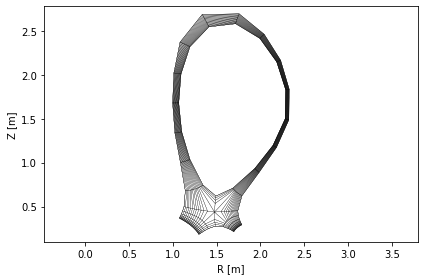

In [5]:
grd=tools.plot.grid() # Function returns figure handle: store to variable for future editing etc.

# TODO: add plasma species/setup investigation

Since we have a new case, we might be interested in the plasma setup. Below, the most central plasma setup parameters are shown:

In [6]:
print('===ION SPECIES===')
print('Number of ion species: {}'.format(com.nisp))
print('Number of impurity ion species: {}'.format(com.nzsp)) # Note that each index specifies one impurity element
# The indices are the number of charge states of that element
print('Number of hydrogenic ion species: {}'.format(com.nhsp))
print('Ion charge states: {}'.format(bbb.ziin[:com.nisp]))
print('Ion mass [a.u.]: {}'.format(bbb.minu[:com.nisp]))
# Note that we have a pure deuterium plasma. The inertial gas model treats atomic hydrogen as a zero-charge ion

print('\n===GAS SPECIES===')
print('Number of gas species: {}'.format(com.ngsp))
print('Number of hydrogenic gas species: {}'.format(com.nhgsp))
print('Number of hydrogenic molecular gas species: {}'.format(bbb.ishymol))
print('Gas species mass: {}'.format(bbb.mg/1.67e-27))

===ION SPECIES===
Number of ion species: 2
Number of impurity ion species: [0 0 0 0 0]
Number of hydrogenic ion species: 2
Ion charge states: [1. 0.]
Ion mass [a.u.]: [2. 2.]

===GAS SPECIES===
Number of gas species: 1
Number of hydrogenic gas species: 1
Number of hydrogenic molecular gas species: 0
Gas species mass: [2.00311377]


Next, one is typically interested in producing contour plots of relevant plasma parameters. A list of commonly used UEDGE parameters can be found in the PyUEDGE documentation, but PyUEDGE also has a package for identifying important plasma parameters, called uedge.uedge_lists.

In [7]:
import uedge.uedge_lists as l
help(l)

Help on module uedge.uedge_lists in uedge:

NAME
    uedge.uedge_lists

DESCRIPTION
    This module uses some of the Forthon methods to provide routines for
    listing and searching the Uedge compiled packages.

FUNCTIONS
    list_package_variables(package, attribute='', vars=None)
        Return list of variable string names from package.
        package - string name of Uedge package.
        attribute='search string' can be either either the 
            group name or an attribute. Search is case
            sensitive and must be exact.
        vars=[varlist] selection limited to varlist
    
    list_packages(objects=None)
        Return list of package string names
        or objects if object argument set.
    
    list_variable(var)
        Print variable information of name passed as a string
        Do not include the package in the variable name.
    
    list_variables_apropos(s, verbose=False, veryverbose=False, vars=None)
        Print variables where comment contains str

We will now use the uedge_list package to identify the electron temperatures and densities:

In [8]:
l.list_variables_apropos('electron temperature')
l.list_variable('te')
l.list_variables_apropos('electron density')
l.list_variable('ne')

Package:    bbb
Group:      Compla
Attributes: Compla 
Dimension:  (0:nx+1,0:ny+1)
            (34, 18)
Type:       double
Address:    140703520967168
Pyaddress:  4657160720
Unit:       J
Comment:
electron temperature in primary cell
Package:    bbb
Group:      Compla
Attributes: Compla 
Dimension:  (0:nx+1,0:ny+1)
            (34, 18)
Type:       double
Address:    140703521248768
Pyaddress:  4657164416
Unit:       m^-3
Comment:
electron dens in primary cell (ix,iy)


Next, we will plot the divertor heatmaps of the electron temperature and density using the ue_plot-package:

Help on function heatmap in module uedge.contrib.holm10.plot:

heatmap(Z, s=None, ax=False, zrange=False, cbar=True, cmap='magma', zoom='div', plotvessel=['sep', 'outline'], maintainaspect=True, xlabel=None, ylabel=None, title=None, units=None, zaxis='lin', showgrid=True)
    Creates a heatmap of requested variable using polygons.
    heatmap(var,**keys)
    
    Variables:
    var:                2D or 3D array containing the cell-center values to be plotted (3D array controlled by s)
    
    Optional arguments:
    s[=0]:              Species index of 3D array to be plotted
    ax[=False]:         axis object on which to plot: if false, creates new figure and returns axis
    zrange:             Tuple defining the lower and upper Z-bounds. Defaults to min/max of Z
                        First tuple entry can be set to "min"/"max" to only limit either Z-boundary
    zaxis:              Z-axis type; "lin"/"log" (TODO log)
    cbar:               Boolean defining whether to plot a ver

/Users/holma2/.local/lib/python3.7/site-packages/uedge/contrib/holm10/plot.py:321: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ret.show()


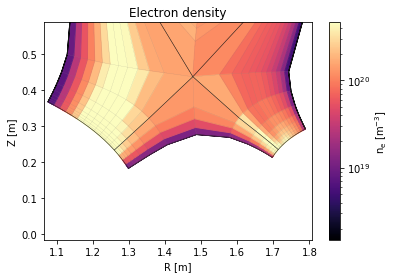

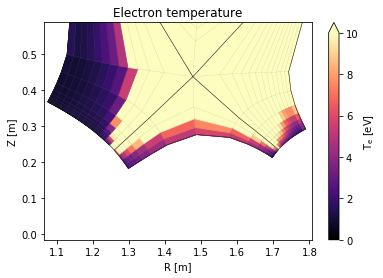

In [9]:
help(tools.plot.heatmap)
ne=tools.plot.heatmap(bbb.ne,zaxis='log',
             title='Electron density', units=r'$\rm{n_e}$ [$\rm{m^{-3}}$]')

te=tools.plot.heatmap(bbb.te/bbb.ev,zrange=(0,10), 
             title='Electron temperature', units=r'$\rm{T_e}$ [eV]') # UEDGE uses SI/MKS units: normalize temperature to eV

Heatmaps give a good overview of the plasma state, but typically it is more interseting to investigate the target and LFS-MP conditions. There are a number of routines implemented for this purpose:

Help on function ot in module uedge.contrib.holm10.plot:

ot(Y, s=None, ax=False, line='-', marker='o', color='k', linewidth=2, markersize=8, xlabel=None, ylabel=False, title='OT profile', xlim=False, ylim=False, yaxis='lin', legend=False, mp=False, psi=False, xaxis='ot', marksep=True)
    Plots the specified parameter along the outer target
    ot(var,**keys)
    
    Variables:
    var:            Variable to be plotted at outer target
    
    Keyword parameters
    ax[=False]:     Axis where to plot. If False, new figure is created. If ax is figure object, plots on first axes object. 
                    If ax is axes object, plots on the requested axes.
    marksep[=True]  Switch whether to mark the separatrix
    line[='-']:     Line style
    marker[='o']     Marker style
    mp[=False]:     Project the target profiles to the midplane
    color[='k']     Marker and line color
    linewidth[=2]   Plotted line width
    markersize[=8]  Plotted marker size
    xlabel:         Strin

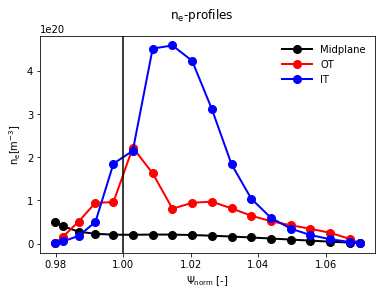

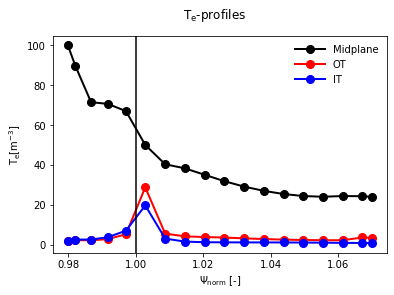

In [12]:
help(tools.plot.ot)

# Plot electron density profiles vs nromalized flux
neprof=tools.plot.mp(bbb.ne,xaxis='psi',marksep=False) # Get figure handle
tools.plot.ot(bbb.ne,xaxis='psi',ax=neprof,color='r',marksep=False) # Plot on same handle
tools.plot.it(bbb.ne,xaxis='psi',ax=neprof,color='b') # Plot on same handle
# Set labels, title, and legend
tools.plot.plot([],[],title=r'$\mathrm{n_e}$-profiles',ylabel=r'$\rm{n_e} [\rm{m^{-3}}]$',legend=['Midplane','OT','IT'],ax=neprof)

# Plot electron temperature profiles vs nromalized flux
# Remember that UEDGE uses SI units - divide by eV
teprof=tools.plot.mp(bbb.te/bbb.ev,xaxis='psi',marksep=False) # Get figure handle
tools.plot.ot(bbb.te/bbb.ev,xaxis='psi',ax=teprof,color='r',marksep=False) # Plot on same handle
tools.plot.it(bbb.te/bbb.ev,xaxis='psi',ax=teprof,color='b') # Plot on same handle
# Set labels, title, and legend
tools.plot.plot([],[],title=r'$\mathrm{T_e}$-profiles',ylabel=r'$\rm{T_e} [\rm{m^{-3}}]$',legend=['Midplane','OT','IT'],ax=teprof)



As you can see, there are functions implemented for efficiently plotting OT, IT, and MP profiles qickly, projected onto a number of locations. Additionally, the plot command allows plotting of any two parameters, with the same options as for the other functions.

Another useful function of PyUEDGE is plotting vector fields to better understand what processes are ocurring in the divertor:

Help on function vector in module uedge.contrib.holm10.plot:

vector(poldata, raddata, ax=False, C=False, datascale=1, arrow_scale=10.0, plotpol=True, plotrad=True, zoom='div', xlabel=None, ylabel=None, title=None, units=None, quiverunits=False, color=(0, 0, 0), cmap=False, plotvessel=['sep', 'outline'], maintainaspect=True, unitlength=False, norm=None, s=None)
    Creates a quiver vector diagram on the supplied grid to the supplied axis.
    vecto(poldata,raddata,**keys)
    
    Variables:
    poldata:    2D array containing poloidal components
    raddata:    2D array containing radial components
    
    Optional arguments:
    s[=0]           Species index to be plotted for multi-species arrays
    ax[=False]:     axis object on which to plot: if False creates and returns fig 
    C[=0 -> "k"]:   2D array containing each arrow color in colormap ranges [0,1]
    cmap[="bwr"]:   Colormap object to use with C, as defined by maplotlib.cm.
    color[=(0,0,0)]:    (r,g,b) tubple definin

/Users/holma2/.local/lib/python3.7/site-packages/uedge/contrib/holm10/plot.py:617: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ret.show()


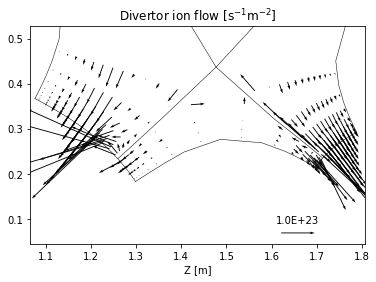

In [13]:
help(tools.plot.vector)
divflow=tools.plot.vector(bbb.fnix[:,:,0]/com.sx,bbb.fniy[:,:,0]/com.sy,norm=1e23,
                 title=r'Divertor ion flow [$\rm{s^{-1}m^{-2}}$]',
                 xlabel='R [m]', ylabel='Z [m]')
# Here, the fluxes are divided by the cell face areas to remove the bias of the cell volume,
# and norm determines the magnitude of the 'unit arrow'

Next, we will increase the core density and evolve the UEDGE case time-dependently to steady-state. Incremental changes to any parameter is recommended, as too large changes may cause issue converging to steady-state. Additionally, this allows storing intermediate solutions in order to create parameter scans.

In [14]:
from uedge.rundt import rundt # Import the routine that converges the case to steady-state by consecutive
from uedge.hdf5 import hdf5_save # Import the save routine

# evaluations at increasing time-step 
print('The current core density is {}'.format(bbb.ncore[:com.nisp])) # Check what the current core density for the ions is
# The other indices control the other ion species, and is only used when isnicore[i]=1
print('The current core BC setup is: {}'.format(bbb.isnicore[:com.nisp]))
# Now, we increase the core density by 3e18
bbb.ncore[0]=5.3e19
#bbb.ncore[0]+=3e18
# Assure convergence at small time-step before launching routine
bbb.dtreal=1e-9 # Initial small time-step
bbb.exmain() # Take the time-step
# Success! Now launch the time-dependent evaluation to steady-state from the time step we know works
rundt(1e-9,savedir='case/solutions/')
# Now, assure convergence at large time-step 
bbb.dtreal=1e20
bbb.exmain()
# Finally, save the solution
hdf5_save('case/solutions/test.hdf5') # We are not running from the run-folder and need to
# define where to save the interim solutions, unless we want them in the cwd.
print('Case label: {}'.format(bbb.label[0]))

The current core density is [5.e+19 7.e+19]
The current core BC setup is: [1 0]
 Wrote file "gridue" with runid:    EFITD    09/07/90      # 66832 ,2384ms                    

 ***** Grid generation has been completed
  Updating Jacobian, npe =                      1
 iter=    0 fnrm=     0.2399999990779906     nfe=      1
  Updating Jacobian, npe =                      2
 iter=    1 fnrm=     0.6310452204998842     nfe=      6
 iter=    2 fnrm=     0.2532075968526528     nfe=     14
 iter=    3 fnrm=     0.1835475354156046     nfe=     21
 iter=    4 fnrm=     0.7613409770430531E-01 nfe=     29
 iter=    5 fnrm=     0.1728954380528947E-01 nfe=     36
  Updating Jacobian, npe =                      3
 iter=    6 fnrm=     0.8726095450493470E-03 nfe=     40
 iter=    7 fnrm=     0.2620216778712427E-05 nfe=     45
 iter=    8 fnrm=     0.4796868552707500E-09 nfe=     51
 iter=    9 fnrm=     0.3004387123786360E-10 nfe=     58


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. fto

 
 iter=    0 fnrm=     0.2359806907342730     nfe=      1
 iter=    1 fnrm=     0.2321968100796299E-03 nfe=      4
 iter=    2 fnrm=     0.7037238038004661E-08 nfe=      9


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
Total time = 6.0080E-08; Timestep = 1.1560E-08 Interpolants created; mype =                   -1

variable index ipt = 1412 bbb.yl[ipt] = 9.0074E-02
 
Total time = 7.1640E-08; Timestep = 1.1560E-08 iter=    0 fnrm=     0.2340564543260016     nfe=      1
 iter=    1 fnrm=     0.4665277190414101E-05 nfe=      5


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1

variable index ipt = 1412 bbb.yl[ipt] = 9.0084E-02
 
 iter=    0 fnrm=     0.2321860027058462     nfe=      1
 i

 iter=    0 fnrm=     0.9050728885206083E-01 nfe=      1
 iter=    1 fnrm=     0.3924331752053351E-02 nfe=     11
 iter=    2 fnrm=     0.2221736073820295E-04 nfe=     24
 iter=    3 fnrm=     0.4488071889151941E-08 nfe=     44


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Total time = 1.5867E-06; Timestep = 4.5435E-07
variable index ipt = 1412 bbb.yl[ipt] = 8.9830E-02
 
 iter=    0 fnrm=     0.1287254686498042     nfe=      1
 iter=    1 fnrm=     0.2247866244471619E-02 nfe=     11
 iter=    2 fnrm=     0.1149921840677962E-04 nfe=     26


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Total time = 2.0411E-06; Timestep = 4.5435E-07


 iter=    0 fnrm=     0.9210111859761480E-01 nfe=      1
 iter=    1 fnrm=     0.3414082006632641E-03 nfe=     15
 iter=    2 fnrm=     0.3775796680210912E-06 nfe=     37


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Total time = 3.4137E-05; Timestep = 5.2523E-06
variable index ipt = 1412 bbb.yl[ipt] = 9.1472E-02
 
 iter=    0 fnrm=     0.8700651289671553E-01 nfe=      1
 iter=    1 fnrm=     0.5342741927665302E-03 nfe=     15
 iter=    2 fnrm=     0.3011498488544429E-06 nfe=     36


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Total time = 3.9389E-05; Timestep = 5.2523E-06
variable index ipt = 1412 bbb.yl[ipt] = 9.1592E-02
 
----

Total time = 9.2897E-04; Timestep = 2.0644E-04
variable index ipt = 1412 bbb.yl[ipt] = 9.1008E-02
 iter=    0 fnrm=     0.1665076373516455E-01 nfe=      1
 iter=    1 fnrm=     0.1935769406044091E-02 nfe=      6
 iter=    2 fnrm=     0.3101138545911482E-05 nfe=     13


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
 
 iter=    0 fnrm=     0.1055334040053466E-01 nfe=      1
 iter=    1 fnrm=     0.3971812408771520E-03 nfe=      7
 iter=    2 fnrm=     0.1837007960044762E-06 nfe=     15


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
Total time = 1.1354E-03; Timestep = 2.0644E-04
 Interpolants created; mype =                   -1
variable index ipt = 1412 bbb.yl[ipt] = 9.1075E-02
 
 ite

 iter=    0 fnrm=     0.6739946372955283E-03 nfe=      1
 iter=    1 fnrm=     0.2167323158581953E-03 nfe=     10
 iter=    2 fnrm=     0.4281643231148016E-07 nfe=     20


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
 iter=    0 fnrm=     0.3634589608928341E-03 nfe=      1
 iter=    1 fnrm=     0.1023846749929432E-02 nfe=     10
 iter=    2 fnrm=     0.4981742801022793E-06 nfe=     16


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Total time = 2.8398E-02; Timestep = 8.1138E-03
variable index ipt = 1412 bbb.yl[ipt] = 9.1934E-02
 
 iter=    0 fnrm=     0.1967516305610223E-03 nfe=      1
 iter=    1 fnrm=     0.1789953723420765E-04 nf

The standard input file will look to restore the solution from the 'case/solutions/'-folder with the name 'label.hdf5', where 'label' is bbb.label of the file. Thus, to create a new case with the new core density, one will have to perform the following steps:
    Copy the original directory
    Change ncore of data/input.py in the new directory
    Change the label to correspond to the case setup (e.g. 'NC53' in this case)
    Save/copy the newly attained solution to setup/ in the new directory with name label.hdf ('e.g. 'NC53.hdf5')

Now, we will assume that we have performed a parameter scan in density and saved all solutions by repeating the above steps (the uedge.contrib scripts conv_step and reconverge may be useful for this) and want to investigate the plasma state as a function of e.g. separatrix density. PyUEDGE has a modules for this purpose.

In [15]:
# Move to the parameter scan folder
%cd ../density_scan
%ls

/Users/holma2/Dropbox (Aalto)/UEDGE/personal_github/UEDGE/PyUEDGE_tutorial/density_scan
NC20/  NC29/  NC38/  NC47/  NC56/  NC65/  NC71/  NC80/  NC89/  NC98/
NC23/  NC32/  NC41/  NC50/  NC59/  NC68/  NC74/  NC83/  NC92/  grid/
NC26/  NC35/  NC44/  NC53/  NC62/  NC70/  NC77/  NC86/  NC95/  rates/


In [16]:
# Import the script to create a database object
import uedge.contrib.holm10.database as db
help(db)
scan=tools.database.create_database()

Help on module uedge.contrib.holm10.database in uedge.contrib.holm10:

NAME
    uedge.contrib.holm10.database - Module defining functions for reading a UEDGE hdf5 dump

CLASSES
    builtins.object
        CASE
        SETUP
    
    class CASE(builtins.object)
     |  CASE(variables=None)
     |  
     |  Class containing UEDGE run data
     |  
     |  Methods defined here:
     |  
     |  __init__(self, variables=None)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  assert_shape(self, arr, s)
     |      Returns a 2D array of species s, or the array itself if already a 2D array
     |  
     |  get(self, var)
     |      Returns the requested parameter
     |  
     |  get_coordinates(self, pos, node=0)
     |      Returns the (R,Z) coordinates of index pos=(x,y) at node(=0 default)
     |  
     |  get_core(self, var, s=None)
     |      Gets the parameter at the core mp
     |  
     |  get_ft(self, var, ft, s=None)
     |      Get the r

File attributes:
     written on:  b'Mon Nov  4 15:01:26 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 iter=    0 fnrm=     0.5813238372239626E-03 nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Warning! bbb.pradz not found
Warning! bbb.pradzc not found
******************************
*** Directory: NC23 ***
******************************
File attributes:
     written on:  b'Mon Nov  4 15:44:08 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 iter=    0 fnrm=     0.7461610855794067E-02 nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Warning! bbb.pradz not found
Warning! bbb

 iter=    0 fnrm=     0.1884445890371155E-02 nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Warning! bbb.pradz not found
Warning! bbb.pradzc not found
******************************
*** Directory: NC70 ***
******************************
Couldn't open hdf5 file  ../solutions/tutorial_nc80.hdf5
 iter=    0 fnrm=      4800000.000000004     nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Warning! bbb.pradz not found
Warning! bbb.pradzc not found
******************************
*** Directory: NC71 ***
******************************
File attributes:
     written on:  b'Mon Nov  4 16:24:39 2019'
        by code:  b'UE

Now, scan is a database object containing all cases (sorted by separatrix electron density by default) of the subfolders (grid, rates, and ignored are automatically omitted), which has a number of associated functions for exploring the parameter scan data:

In [17]:
help(scan)

Help on SETUP in module uedge.contrib.holm10.database object:

class SETUP(builtins.object)
 |  SETUP(caselist)
 |  
 |  Class containing a list of CASE objects
 |  
 |  Methods defined here:
 |  
 |  __init__(self, caselist)
 |      Stores the list sorted by midplane separatrix electron density
 |  
 |  check_species(self, var, s)
 |      Boolean that checks whether the parameter requested has a species index
 |  
 |  core(self, var, s=None)
 |      Returns a list values of var at the separatrix (immediately outside) midplane
 |      mp(var,**keys)
 |      
 |      Variables:
 |      var:        String of variable to be returned, e.g. 'bbb.ne'
 |      
 |      Keyword parameters:
 |      s[=0]:      Species index to be used, defaults to 0
 |  
 |  ft(self, var, ft, s=None)
 |      Returns a list of 1D arrays containing var along flux-tube ft
 |      ft(var,ft,**keys)
 |      
 |      Variables:
 |      var:        String of variable to be returned, e.g. 'bbb.ne'
 |      ft:         Fl

The default database contains ~70 parameters, as defined by default_variables, but any list of parameter passed to the keyword parameter 'variables' will be saved, if present in the PyUEDGE case.

In [18]:
print(tools.database.default_variables())

['bbb.feex', 'bbb.feey', 'bbb.feix', 'bbb.feiy', 'bbb.fegx', 'bbb.fegy', 'bbb.fnix', 'bbb.fniy', 'bbb.fngx', 'bbb.fngy', 'bbb.te', 'bbb.ti', 'bbb.tg', 'bbb.ne', 'bbb.ni', 'bbb.ng', 'bbb.up', 'bbb.uup', 'bbb.vy', 'bbb.vex', 'bbb.upe', 'bbb.vey', 'com.xcs', 'com.yyc', 'com.rm', 'com.zm', 'com.gxf', 'com.gx', 'com.gyf', 'com.gy', 'com.dx', 'com.dy', 'bbb.eqpg', 'bbb.eqp', 'com.vol', 'com.nx', 'com.ny', 'bbb.ixmp', 'com.ixpt1', 'com.ixpt2', 'com.iysptrx', 'com.sx', 'com.sy', 'com.bpol', 'com.bphi', 'bbb.hcxg', 'bbb.hcyg', 'bbb.floxge', 'bbb.floyge', 'bbb.conxge', 'bbb.conyge', 'bbb.kxg_use', 'bbb.kyg_use', 'bbb.psor', 'bbb.psordis', 'bbb.psorrgc', 'bbb.pradiz', 'bbb.pradrc', 'bbb.pbinde', 'bbb.pbindrc', 'bbb.prdiss', 'bbb.pibirth', 'bbb.pradc', 'bbb.pradz', 'bbb.pradzc', 'bbb.prad', 'bbb.pradht', 'bbb.erliz', 'bbb.erlrc', 'bbb.psorbgg', 'bbb.psorbgz', 'bbb.ziin', 'bbb.minu', 'bbb.mi', 'bbb.mg', 'bbb.ziin', 'bbb.label']


Plotting the behavior of any parameter is very efficient using the plotting packages. Note that the parameters now are dictionary objects and must be accessed by passing the variable names as strings to the functions.

/Users/holma2/.local/lib/python3.7/site-packages/uedge/contrib/holm10/plot.py:1454: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ret.show()


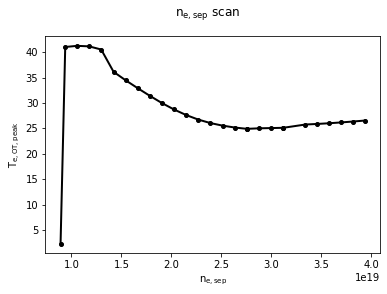

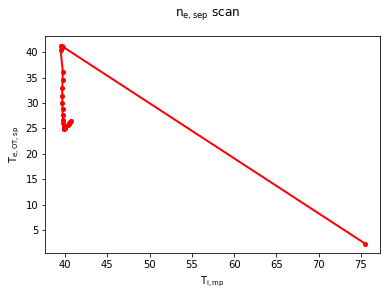

In [19]:
# Peak target density profile as function of separatrix density
tepeak_scan=tools.plot.plot(scan.mp('bbb.ne'),scan.ot_max('bbb.te')/bbb.ev,marker='.')
tools.plot.plot([],[],title=r'$\rm{n_{e,sep}}$ scan',xlabel=r'$\rm{n_{e,sep}}$',ylabel=r'$\rm{T_{e,OT,peak}}$',ax=tepeak_scan)

# Strike-point Te vs Ti,mp
tesp_scan=tools.plot.plot(scan.mp('bbb.ti')/bbb.ev,scan.sep('bbb.te')[:,-1]/bbb.ev,color='r',marker='.')
tools.plot.plot([],[],title=r'$\rm{n_{e,sep}}$ scan',xlabel=r'$\rm{T_{i,mp}}$',ylabel=r'$\rm{T_{e,OT,sp}}$',ax=tesp_scan)
# Here, each function of the database returns a list with length corresponding to the number of cases,
# e.g. the first dimension corresponds to the parameter scan. Any remaining dimensions are determined by the call.
# Here, we requested the separatrix flux-tube, so the returned array is 2D with the second dimension being
# nx long (guard cells are cut away internally). The UEDGE grid does from inner to outer target, thus
# the last index (called by -1 in Python) corresponds to the OT strikepoint. 

Now, try plotting any combination of parameters above, or try integrating over a surface, e.g. ion current to the OT.

Finally, we will demonstrate a powerful visualization tool for understanding your parameter scan: animated plots. The plots create a figure from each subfolder, each case being given an equal frame-rate, so linear parameter scans are displayed in proportion. The animate module restores each case in it's location, so any UEDGE variables are available for plotting, but must be passed as strings to the function. The animation functions can also execute a set of commands before plotting, in case you want to turn any terms off before plotting (e.g. convective/conductive fluxes, etc.).

In [20]:
# Load animation package
from IPython.display import HTML # Package to display animations in Jupyter Notebook
import uedge.contrib.holm10.animate as animate
help(animate)

Help on module uedge.contrib.holm10.animate in uedge.contrib.holm10:

NAME
    uedge.contrib.holm10.animate - # Holm10 Nov 5 2019, created from scratch

FUNCTIONS
    ani_ft(variable, plotft, path='.', yaxis='lin', ylim=False, show_animation=True, save=False, fps=10, figsize=(9.708, 6), keys={}, steps='', framerate=1, output='gif', database=None, subplot=None, commands=[])
        Function creating a flux-tube plot  animation 
        ani_ft(var,ft,**keys)        
        
        Arguments:
        var:                Variable name to be plotted as string
        ft:                 Index of flux tube to be animated        
        
        Keyword arguments
        show[=True]:        Boolean determining whether to show plot or not
        save[=False]:       If animation is to be saved, save must be set as path and save file name
        interval[=1000]:    Time in ms each frame is shown
        figsize             Tuple containing the figure width and height
        keys:          

Frame  1  of  28
File attributes:
     written on:  b'Mon Nov  4 15:01:26 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 iter=    0 fnrm=     0.5813238372239626E-03 nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Frame  2  of  28
File attributes:
     written on:  b'Mon Nov  4 15:44:08 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 iter=    0 fnrm=     0.7461610855794067E-02 nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Frame  3  of  28
File attributes:
     written on:  b'Mon Nov  4 15:45:48 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 iter=    0 

Frame  20  of  28
File attributes:
     written on:  b'Mon Nov  4 16:26:16 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 iter=    0 fnrm=     0.1743021643115844E-02 nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Frame  21  of  28
File attributes:
     written on:  b'Mon Nov  4 16:27:54 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 iter=    0 fnrm=     0.1701908528548223E-02 nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Frame  22  of  28
Couldn't open hdf5 file  ../solutions/tutorial_nc20.hdf5
 iter=    0 fnrm=      22800000.00000000     nfe=      1


 nksol ---  iter

/Users/holma2/.local/lib/python3.7/site-packages/uedge/contrib/holm10/animate.py:557: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=axes()


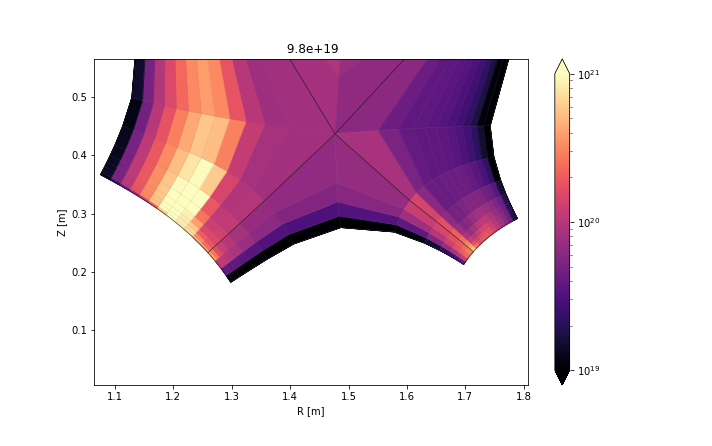

In [21]:
# Animate the electron density in the divertor
anine=tools.animate.ani_hm('bbb.ne',zaxis='log',fps=3,zrange=(1e19,1e21))
HTML(anine.to_html5_video()) # Display animation in Jupyter - not required if running from Python prompt
# If you get an ffmpeg writer error, execute the follwing command in a terminal prompt
# "conda install -c conda-forge ffmpeg", which installs the ffmpeg package for displaying animations in Jupyter

Frame  1  of  28
File attributes:
     written on:  b'Mon Nov  4 15:01:26 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 iter=    0 fnrm=     0.5813238372239626E-03 nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Frame  2  of  28
File attributes:
     written on:  b'Mon Nov  4 15:44:08 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 iter=    0 fnrm=     0.7461610855794067E-02 nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Frame  3  of  28
File attributes:
     written on:  b'Mon Nov  4 15:45:48 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 iter=    0 

Frame  20  of  28
File attributes:
     written on:  b'Mon Nov  4 16:26:16 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 iter=    0 fnrm=     0.1743021643115844E-02 nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Frame  21  of  28
File attributes:
     written on:  b'Mon Nov  4 16:27:54 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 iter=    0 fnrm=     0.1701908528548223E-02 nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Frame  22  of  28
Couldn't open hdf5 file  ../solutions/tutorial_nc20.hdf5
 iter=    0 fnrm=      22800000.00000000     nfe=      1


 nksol ---  iter

/Users/holma2/.local/lib/python3.7/site-packages/uedge/contrib/holm10/animate.py:438: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=axes()


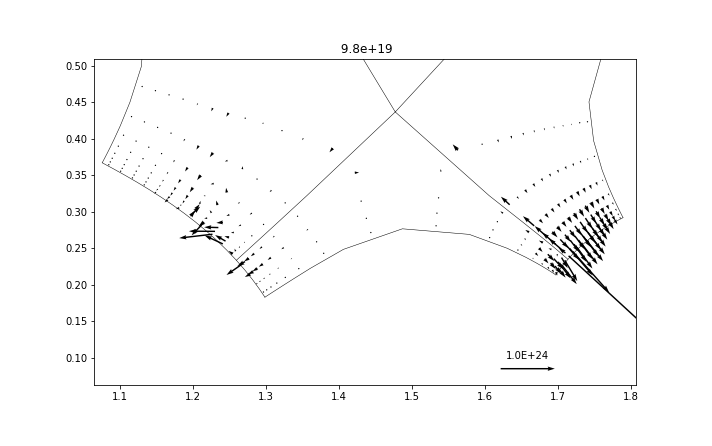

In [22]:
# Animate the ion fluxes in the divertor
aniflow=tools.animate.ani_vec('bbb.fnix[:,:,0]/com.sx','bbb.fniy[:,:,0]/com.sy',norm=1e24,fps=3)
HTML(aniflow.to_html5_video()) # Display animation in Jupyter - not required if running from Python prompt

Frame  1  of  28
File attributes:
     written on:  b'Mon Nov  4 15:01:26 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 iter=    0 fnrm=     0.5813238372239626E-03 nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Frame  2  of  28
File attributes:
     written on:  b'Mon Nov  4 15:44:08 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 iter=    0 fnrm=     0.7461610855794067E-02 nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Frame  3  of  28
File attributes:
     written on:  b'Mon Nov  4 15:45:48 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 iter=    0 

File attributes:
     written on:  b'Mon Nov  4 16:26:16 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 iter=    0 fnrm=     0.1743021643115844E-02 nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Frame  21  of  28
File attributes:
     written on:  b'Mon Nov  4 16:27:54 2019'
        by code:  b'UEDGE'
    physics tag:  [b'$Name:  $']
 iter=    0 fnrm=     0.1701908528548223E-02 nfe=      1


 nksol ---  iterm = 1.
            maxnorm(sf*f(u)) .le. ftol, where maxnorm() is
            the maximum norm function.  u is probably an
            approximate root of f.
 Interpolants created; mype =                   -1
Frame  22  of  28
Couldn't open hdf5 file  ../solutions/tutorial_nc20.hdf5
 iter=    0 fnrm=      22800000.00000000     nfe=      1


 nksol ---  iterm = 1.
           

/Users/holma2/.local/lib/python3.7/site-packages/uedge/contrib/holm10/animate.py:797: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=axes()


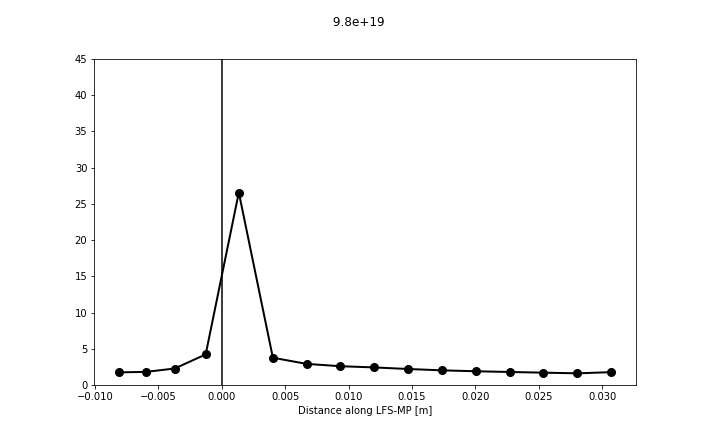

In [23]:
# Animate the OT ion temperature
aniOTte=tools.animate.ani_row('bbb.te/bbb.ev',-2,fps=3,ylim=(0,45)) # Poloidal index -1 corresponds to nx+1, which is a Guard Cell
# Use -2 instead!
HTML(aniOTte.to_html5_video()) # Display animation in Jupyter - not required if running from Python prompt